### Kaustav Vats | 2016048

In [122]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from itertools import product
from matplotlib import pyplot as plt
%matplotlib inline
print("[+] Import Done!")

[+] Import Done!


### Functions

In [143]:
def load_data(filename):
    data, meta = arff.loadarff(filename)
    dataframe = pd.DataFrame(data)
    dataframe_meta = pd.DataFrame(meta)
    attributesList = dataframe_meta.iloc[:].values
    return dataframe, dataframe_meta, attributesList

# Converting Data to UTF-8 Format
# Removing NaN values
def pre_processing(dataframe, attributesList):
    for i in range(attributesList.shape[0]):
        dataframe[attributesList[i][0]] = dataframe[attributesList[i][0]].str.decode('utf-8')
    dataframe = dataframe.replace('?', np.NaN)
    dataframe = dataframe.replace('NULL', np.NaN)
    dataframe = dataframe.dropna(axis=1, thresh=int(0.5 * dataframe.shape[0]))
    # one hot encoding
    Columns = dataframe.columns
    dataframe = one_hot_encoding(dataframe, Columns)
#     dataframe.head(20)

    # label encoder
    data = dataframe.iloc[:, :].values
    data = convert_binary_class(data)
#     print(data.shape)
    return data, dataframe, Columns

def pre_processing_test(dataframe, attributesList, Columns):
    for i in range(attributesList.shape[0]):
        dataframe[attributesList[i][0]] = dataframe[attributesList[i][0]].str.decode('utf-8')
    dataframe = dataframe.replace('?', np.NaN)
    dataframe = dataframe.replace('NULL', np.NaN)
    
    dataframe = pd.concat([df[Columns[i]] for i in range(len(Columns))], axis=1, keys=Columns)
    
    # one hot encoding
    dataframe = one_hot_encoding(dataframe, Columns)
#     dataframe.head(20)

    # label encoder
    data = dataframe.iloc[:, :].values
    data = convert_binary_class(data)
#     print(data.shape)
    return data, dataframe

def convert_binary_class(data):
    LabelEncoder_Y = LabelEncoder()
    class_index = data.shape[1]-1
    data[:, class_index] = LabelEncoder_Y.fit_transform(data[:, class_index])
    return data

def one_hot_encoding(df, Columns):
    arr = []
    for i in range(len(Columns)):
        if i == (len(Columns)-1):
            arr.append(df[Columns[i]])
        else:
            arr.append(pd.get_dummies(df[Columns[i]], dummy_na=True))
    df = pd.concat(arr, axis=1)
    return df

### Load Data

In [144]:
data_file_name = "Data/training_subsetD.arff"
df, df_meta, attributes_list = load_data(data_file_name)
print("[+] Data Loaded!")

[+] Data Loaded!


### Data Pre-processing

In [145]:
data, df2, Columns = pre_processing(df, attributes_list)
# print(df2.columns)
df2.head()
# print(data.shape)

,'\'(-inf-187131.5]\'','\'(187131.5-425048]\'','\'(425048-662136.5]\'','\'(662136.5-883316]\'','\'(883316-inf)\'',nan,'\'(-inf-82045]\'','\'(164065-247691]\'','\'(247691-322370]\'','\'(322370-inf)\'',...,nan,'(12 ___ 14]','(14 ___ 17]','(17 ___ 22]','(22 ___)','(5 ___ 9]','(9 ___ 12]','(___ 5]',nan,Class
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,False
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,True
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,False
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,True
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,False


In [146]:
# Reading Test dataset
data_file_name = "Data/testingD.arff"
df_test, df_meta_test, attributes_list_test = load_data(data_file_name)
print("[+] Data Loaded!")

test_data, df3 = pre_processing_test(df_test, attributes_list, Columns)

[+] Data Loaded!


### Question 1

In [147]:
TrainSize = data.shape[1]-1
data = data.astype(np.int64)
X = data[:, :TrainSize]
Y = data[:, TrainSize]

test_data = test_data.astype(np.int64)
X_Test = test_data[:, :TrainSize]
Y_Test = test_data[:, TrainSize]
print("X_Test", X_Test.shape)
print("Y_Test", Y_Test.shape)

X_Test (40000, 816)
Y_Test (40000,)


In [154]:
# X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.33, random_state=42)
# print("X_Train: {}".format(X_Train.shape))
# print("X_Test: {}".format(X_Test.shape))
# print("Y_Train: {}".format(Y_Train.shape))
# print("Y_Test: {}".format(Y_Test.shape))

clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)
score = clf.score(X_Test, Y_Test)
print("Accuracy:", score*100)
score = clf.score(X, Y)
print("Train Acc:", score*100)

Accuracy: 53.26
Train Acc: 94.82000000000001


In [163]:
BestDep = -1
BestAcc = 0
Depths = []
for i in range(5, 100, 10):
    Depths.append(i)
# Depths = [10, 50, 100, 150, 200, 250]
TrainAcc = np.zeros((5, len(Depths)))
ValAcc = np.zeros((5, len(Depths)))
TestAcc = np.zeros((5, len(Depths)))

i=0
# kf = KFold(n_splits=5, random_state=0.42, shuffle=True)
kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    for j in range(len(Depths)):
        clf = DecisionTreeClassifier(max_depth=Depths[j])
        clf = clf.fit(X_train, y_train)
        TrainAcc[i, j] = clf.score(X_train, y_train)
        ValAcc[i, j] = clf.score(X_test, y_test)
        TestAcc[i, j] = clf.score(X_Test, Y_Test)
    i+=1

In [164]:
TAcc = np.mean(TrainAcc, axis=0)
VAcc = np.mean(ValAcc, axis=0)            
TeAcc = np.mean(TestAcc, axis=0)            

print(TAcc)
print(VAcc)
print(TeAcc) 
BestAcc = np.amax(VAcc)
BestDep = Depths[np.argmax(VAcc)]
print("BestAcc: {}".format(BestAcc))
print("BestDep: {}".format(BestDep))

[0.80562501 0.853425   0.92145008 0.94451876 0.95034374 0.95095624
 0.95098124 0.95098124 0.95098124 0.95098124]
[0.804825   0.78587463 0.76337471 0.75650001 0.75627473 0.75459973
 0.75484976 0.75542479 0.75437459 0.75509986]
[0.778105 0.43211  0.39154  0.41784  0.41614  0.43441  0.43754  0.389755
 0.392535 0.36587 ]
BestAcc: 0.8048249975601562
BestDep: 5


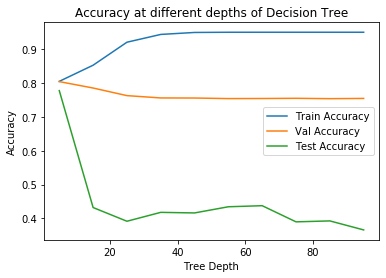

In [165]:
plt.figure()
plt.plot(Depths, TAcc, label="Train Accuracy")
plt.plot(Depths, VAcc, label="Val Accuracy")
plt.plot(Depths, TeAcc, label="Test Accuracy")
plt.title("Accuracy at different depths of Decision Tree")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()

### Question 2

In [169]:
pca = PCA(n_components=2)
pca.fit(X)
X_New = pca.transform(X)
X_Test_New = pca.transform(X_Test)

# Naive Baye classifier
clf1 = GaussianNB()
clf1 = clf1.fit(X_New, Y)
print("GaussianNB Acc: {}".format(clf1.score(X_Test_New, Y_Test)*100))

# KNeighborsClassifier
clf2 = KNeighborsClassifier(n_jobs=-1)
clf2 = clf2.fit(X_New, Y)
print("KNeighborsClassifier Acc: {}".format(clf2.score(X_Test_New, Y_Test)*100))

# DecisionTreeClassifier
clf3 = DecisionTreeClassifier(max_depth=BestDep)
clf3 = clf3.fit(X_New, Y)
print("DecisionTreeClassifier Acc: {}".format(clf3.score(X_Test_New, Y_Test)*100))

for clf in [clf1, clf2, clf3]:
    print(clf.score(X_New, Y))

GaussianNB Acc: 55.81
KNeighborsClassifier Acc: 85.30499999999999
DecisionTreeClassifier Acc: 85.44
0.802925
0.8327
0.80505


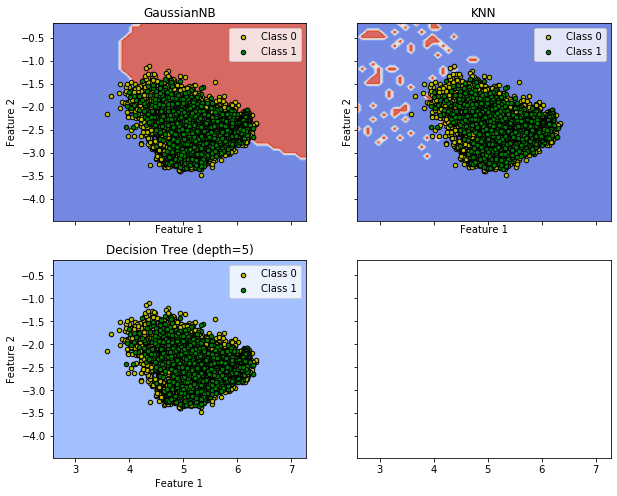

In [170]:
# plotting decision boundary

def plotDecisionBoundary(Data, Label, Clfs, Names):
    x = []
    y = []
    x2 = []
    y2 = []
    for i in range(Label.shape[0]):
        if Label[i] == 0:
            x.append(float(Data[i, 0]))
            y.append(float(Data[i, 1]))
        else:
            x2.append(float(Data[i, 0]))
            y2.append(float(Data[i, 1]))
            
    x_min, x_max = Data[:, 0].min() - 1, Data[:, 0].max() + 1
    y_min, y_max = Data[:, 1].min() - 1, Data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
    # ([0, 0], [1, 0], [2, 0])
    for idx, clf, tt in zip(([0, 0], [0, 1], [1, 0]), Clfs, Names):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axarr[idx[0], idx[1]].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        axarr[idx[0], idx[1]].scatter(x, y, c='y', s=20, edgecolor='k', label="Class 0")
        axarr[idx[0], idx[1]].scatter(x2, y2, c='g', s=20, edgecolor='k', label="Class 1")
        axarr[idx[0], idx[1]].set_title(tt)
        axarr[idx[0], idx[1]].set_xlabel("Feature 1")
        axarr[idx[0], idx[1]].set_ylabel("Feature 2")
        axarr[idx[0], idx[1]].legend()
#     plt.title("Data Visualization - with decision boundary")
    plt.show()
plotDecisionBoundary(X_Test_New, Y_Test, [clf1, clf2, clf3], ["GaussianNB", 'KNN', 'Decision Tree (depth={})'.format(BestDep)])    
# plotDecisionBoundary(X_New, Y, [clf1, clf2, clf3], ["GaussianNB", 'KNN', 'Decision Tree (depth={})'.format(BestDep)])